# LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

# READ DATA

Process of this is Preparation in Google Colab

In [2]:
data = pd.read_csv('ecommerce_dummy_data.csv')
data

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
0,bdd640fb,b5ef1ee6,0f043e7d,Sports,War,190.89,3,572.67,2024-04-04,2024-10-31,Free Shipping,Cash on Delivery,Cancelled,Edwin Murphy,sara49@example.net,Chicago,"23923 Christopher Crossroad Suite 959, West Kr..."
1,23b8c1e9,28a625e1,8507eade,Electronics,Professional,114.23,10,1142.30,2024-09-08,2024-12-16,Buy One Get One,Bank Transfer,Delivered,Joshua Williams,wmills@example.com,New York,"7388 Jones Via Apt. 146, Harrisview, MN 47138"
2,bd9c66b3,9631be62,cad267b4,Electronics,His,238.14,3,714.42,2024-05-21,2024-09-03,Discount,Cash on Delivery,Shipped,Amy Edwards,dcannon@example.org,Chicago,"452 Amy Plaza Suite 075, Lake David, ID 86881"
3,972a8469,3dc1e882,26e25157,Sports,Third,244.78,8,1958.24,2024-01-30,2024-09-01,Buy One Get One,Credit Card,Shipped,Jason Horton,michelle22@example.com,Phoenix,"260 Edwards Burg, Millermouth, MH 82030"
4,17fc695a,4279dcd6,9ca94273,Home & Kitchen,Something,445.79,2,891.58,2024-12-16,2025-01-26,Free Shipping,PayPal,Delivered,Stephanie Gordon,patrickcochran@example.org,Los Angeles,"2116 Adams Circles, North Luke, MD 90638"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,f3986f93,d892f59b,addfe2fe,Clothing,Red,94.33,1,94.33,2024-03-07,2024-11-14,Buy One Get One,Cash on Delivery,Cancelled,Jeffrey Brown,maryhill@example.net,Houston,"32396 Collier Locks, Doylemouth, ME 85112"
9996,507409da,65123e60,51dadd61,Sports,Yeah,226.18,1,226.18,2024-02-05,2024-12-15,No Promotion,Bank Transfer,Cancelled,Christopher Alexander,larsonjacob@example.org,Seattle,"915 Jamie Gardens Apt. 944, Elizabethfurt, MS ..."
9997,bce4d414,e1e54c0b,0a6099e4,Books,After,413.31,9,3719.79,2024-10-16,2024-12-29,Discount,PayPal,Shipped,Carolyn Hartman,xwallace@example.com,Chicago,"11532 Kenneth Park, Kimberlyville, MI 37826"
9998,0eca3630,9683db86,d26e045e,Health & Beauty,Tax,431.00,1,431.00,2024-04-14,2024-11-12,Buy One Get One,Credit Card,Pending,Sarah Snow,michael79@example.com,Los Angeles,"5646 Thomas Mountains Suite 577, Dawnmouth, SD..."


# DATA UNDERSTANDING

# EXPLORATORY DATA ANALYSIS (EDA) PART 1

## TYPE DATA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           10000 non-null  object 
 1   Customer ID        10000 non-null  object 
 2   Product ID         10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Product Name       9988 non-null   object 
 5   Price              10000 non-null  float64
 6   Quantity           10000 non-null  int64  
 7   Total Price        10000 non-null  float64
 8   Order Date         10000 non-null  object 
 9   Shipping Date      10000 non-null  object 
 10  Promotion          10000 non-null  object 
 11  Payment Method     10000 non-null  object 
 12  Shipping Status    10000 non-null  object 
 13  Customer Name      10000 non-null  object 
 14  Customer Email     10000 non-null  object 
 15  Customer Location  10000 non-null  object 
 16  Delivery Address   1000

Type Data of columns have 3 Type, The Type is Object,Float, and Interger. Many columns have Type Object, but i watch mistake in type of order date and shipping date, wich should the column of order date and shipping date have type date

## MISSING VALUE

In [4]:
missing = data.isnull().sum().rename('Amount').sort_values(ascending = False)

# Change to DataFrame (from series)
missing = pd.DataFrame(missing)
missing

,Amount
Product Name,12
Order ID,0
Shipping Date,0
Customer Location,0
Customer Email,0
Customer Name,0
Shipping Status,0
Payment Method,0
Promotion,0
Order Date,0


In [5]:
missing['Percentage'] = round(missing['Amount']  / len(data) * 100,2)
missing

,Amount,Percentage
Product Name,12,0.12
Order ID,0,0.00
Shipping Date,0,0.00
Customer Location,0,0.00
Customer Email,0,0.00
Customer Name,0,0.00
Shipping Status,0,0.00
Payment Method,0,0.00
Promotion,0,0.00
Order Date,0,0.00


In [6]:
data[data.isna().any(axis = 1)]

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
1773,be153187,ae672648,c647557b,Clothing,NaN,443.26,7,3102.82,2024-05-23,2025-01-03,No Promotion,Credit Card,Delivered,Jennifer Parker,kevin35@example.net,San Francisco,"6467 Kelsey Island, Laurenfort, CO 29290"
2669,42ac66dc,03467306,19e31a3f,Home & Kitchen,NaN,203.03,6,1218.18,2024-04-25,2024-10-18,No Promotion,Credit Card,Pending,Sandy Casey,robertcontreras@example.org,Phoenix,"72463 Cook Vista Apt. 867, Stephaniehaven, OH ..."
3143,45fb3e8a,c886878d,c1a08ac0,Home & Kitchen,NaN,59.52,1,59.52,2024-08-01,2024-09-07,Discount,Cash on Delivery,Cancelled,Paul Welch,lisa54@example.net,New York,"364 Daniel Common, South Melissamouth, ME 41161"
3740,a1243bea,f6300953,6957dc86,Toys,NaN,65.54,6,393.24,2024-01-24,2024-04-25,Discount,PayPal,Shipped,Yvonne Good,bartonrobin@example.net,Los Angeles,"39429 Arnold Dale, Pattersonport, ME 97889"
4871,3313f36c,14f89da1,9b7e823a,Home & Kitchen,NaN,245.03,10,2450.30,2024-04-09,2024-07-09,Discount,PayPal,Shipped,Rebecca Taylor,harrisonkathryn@example.com,Los Angeles,"7180 Richard Manors Apt. 832, Timothyfurt, MN ..."
5187,4269f091,c3580e4c,cd68c7a0,Books,NaN,363.52,5,1817.60,2024-01-23,2024-10-31,Buy One Get One,Credit Card,Pending,Darin Valencia,lchase@example.com,Chicago,"25390 Johnson Valleys, Savannahmouth, OH 66752"
6849,e387eb15,97f94128,1445dde0,Clothing,NaN,101.33,4,405.32,2024-11-02,2024-12-25,Free Shipping,PayPal,Delivered,Derek Richard,april35@example.org,Houston,"718 Lisa Springs Suite 237, West Gabrielboroug..."
7140,6e025590,5257acfc,f4be5f7b,Books,NaN,51.95,1,51.95,2024-11-30,2024-12-25,No Promotion,Bank Transfer,Cancelled,Stephanie Carter,evan06@example.com,Seattle,"504 Michael Track Suite 928, West Scott, PA 61796"
8529,f16231e0,2dc829e0,ad662890,Clothing,NaN,153.60,7,1075.20,2024-09-01,2025-01-25,Free Shipping,Bank Transfer,Shipped,Andrea Smith,stephanie28@example.org,Phoenix,"Unit 0044 Box 7953, DPO AP 75663"
8663,5caf5c6a,a9f93896,4988a87c,Health & Beauty,NaN,319.35,3,958.05,2024-07-01,2024-09-22,Free Shipping,Bank Transfer,Delivered,Alison Soto,tara19@example.com,San Francisco,"763 Frazier Passage Apt. 901, Pottershire, NE ..."


Missing Value is in Product Name, I will first find out whether Missing Value can be saved? I will find out by looking at the Product ID whether there is one that is the same as the Product ID in Product Name that has Missing Value.

In [15]:
data[data['Product ID'] == 'c647557b']

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
1773,be153187,ae672648,c647557b,Clothing,NaN,443.26,7,3102.82,2024-05-23,2025-01-03,No Promotion,Credit Card,Delivered,Jennifer Parker,kevin35@example.net,San Francisco,"6467 Kelsey Island, Laurenfort, CO 29290"


In [16]:
data[data['Product ID'] == '19e31a3f']

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
2669,42ac66dc,03467306,19e31a3f,Home & Kitchen,NaN,203.03,6,1218.18,2024-04-25,2024-10-18,No Promotion,Credit Card,Pending,Sandy Casey,robertcontreras@example.org,Phoenix,"72463 Cook Vista Apt. 867, Stephaniehaven, OH ..."


In [17]:
data[data['Product ID'] == 'c1a08ac0']

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
3143,45fb3e8a,c886878d,c1a08ac0,Home & Kitchen,NaN,59.52,1,59.52,2024-08-01,2024-09-07,Discount,Cash on Delivery,Cancelled,Paul Welch,lisa54@example.net,New York,"364 Daniel Common, South Melissamouth, ME 41161"


Missing Value cannot be saved, because Missing Value is a percentage of 0.12 of the total, I will delete Missing Value because it does not have a significant impact if it is there or not.

## DUPLICATED DATA

In [7]:
data.duplicated().sum()

0

No duplicate data

## NUMERIC VARIABLE

### DESCRIPTIVE STATISTICS

In [8]:
data.describe()

,Price,Quantity,Total Price
count,10000.000000,10000.000000,10000.000000
mean,253.323322,5.450800,1386.926337
std,143.130789,2.901383,1157.382082
min,5.000000,1.000000,5.050000
25%,129.822500,3.000000,431.275000
50%,252.355000,5.000000,1043.640000
75%,377.605000,8.000000,2100.220000
max,499.850000,10.000000,4998.500000


### STATISTICAL TEST

Because NaN data or Missing Data just in Product Name, so we can execute the numerical value, if we have Missing Data in numerical value we cannot be run in Statistical Tests, Missing Data is temporarily deleted.

I chose to use a variety of statistical test methods to test the normality of the data to get a more complete picture. Each statistical test, such as Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov, has its own advantages and disadvantages, depending on the characteristics of the sample and the purpose of the analysis. By combining these methods, I can ensure that the results of the normality test are more robust and reduce the potential for errors in interpretation. This approach provides greater accuracy in choosing the right statistical model or transformation technique for further analysis.

In [9]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [10]:
# Function to test normality
def normality_tests(data):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(data)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(data)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(data)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    print(f"RESULTS FOR {column}:")
    results = normality_tests(data[column])  # Removing missing values
    for test, (stat, p_value) in results.items():
        normality_status = check_normality(p_value)
        print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
    print("\n")

RESULTS FOR Price:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0614, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9537, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 9780.6476, p-value: 0.0000 -> Not Normal


RESULTS FOR Quantity:
Kolmogorov-Smirnov - Statistic: 0.8700, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.1154, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9328, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 13532.0300, p-value: 0.0000 -> Not Normal


RESULTS FOR Total Price:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.1174, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9006, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 1083.3838, p-value: 0.0000 -> Not Normal




/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


### OUTLIERS

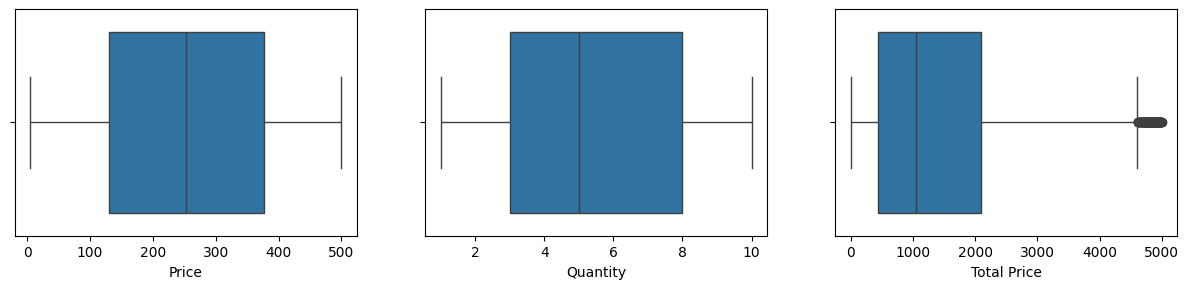

In [11]:
# Select numeric columns
numeric = data.select_dtypes(include = 'number')  # float and int

plt.figure(figsize = (15,10))  # (rows, columns)
position = 1
for column in numeric.columns:
    plt.subplot(3, 3, position)  # (rows, columns, position)
    sns.boxplot(x = data[column])
    position += 1

# Print the plot
plt.show()

In [18]:
data[data['Total Price'] >= 4700]

,Order ID,Customer ID,Product ID,Category,Product Name,Price,Quantity,Total Price,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
141,81627cf1,42cc32f8,fb9051cf,Clothing,Difficult,478.53,10,4785.3,2024-03-20,2024-10-21,Free Shipping,PayPal,Shipped,Kathleen Stevens,nelsontricia@example.com,Seattle,"Unit 8665 Box 9254, DPO AE 93163"
176,e08596db,1b35caa1,75ceb460,Toys,Throughout,485.51,10,4855.1,2024-12-13,2024-12-24,Discount,Credit Card,Delivered,Dustin Todd,elliottsarah@example.com,Chicago,"66271 Schroeder Rapids Suite 092, North Amanda..."
185,f0b5156b,16520d40,8b795457,Toys,According,486.74,10,4867.4,2024-06-07,2024-10-04,Free Shipping,Credit Card,Shipped,Keith Rodgers,tjones@example.org,Seattle,"146 Parker Land Suite 175, Hardinfurt, AS 03805"
415,1986b4b2,5d3e4cae,67f66367,Electronics,Bad,471.21,10,4712.1,2024-05-27,2024-12-06,Buy One Get One,Bank Transfer,Cancelled,Emily Barry,colonmichele@example.com,New York,"08511 Veronica Field Apt. 929, Curtisfurt, MA ..."
735,b12b6680,7ea0fd8d,74972cb5,Sports,Customer,483.57,10,4835.7,2024-11-21,2024-11-29,No Promotion,Bank Transfer,Pending,Patrick Turner,andrew23@example.com,Chicago,"0632 Mcconnell Extensions, North Heatherfort, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,59430636,ebc52769,e1cc79fc,Clothing,Body,489.87,10,4898.7,2024-03-19,2024-12-05,Discount,Credit Card,Delivered,Daryl Taylor,hstanley@example.com,New York,"0655 Maria Forks, New Joseph, OH 29074"
9527,b1f6d38e,83704ccb,ca4949b1,Toys,As,486.97,10,4869.7,2024-05-17,2024-05-19,Buy One Get One,Cash on Delivery,Delivered,Sheila Poole,jessicadavis@example.net,Los Angeles,"883 Phillips Views Apt. 617, Port Christopherb..."
9573,1345c526,063c91f9,1e005657,Books,Hand,496.11,10,4961.1,2024-09-16,2024-10-24,Free Shipping,PayPal,Delivered,Carl Reyes,rhondasanchez@example.net,San Francisco,"64580 George Drives Apt. 267, Schultzshire, TN..."
9928,4f52ddca,9dc34411,091cabe5,Home & Kitchen,Course,471.36,10,4713.6,2024-11-20,2024-12-03,Free Shipping,Cash on Delivery,Shipped,Randy Carroll,hawkinsjames@example.com,New York,"37784 William Tunnel Suite 311, North Krista, ..."


Outliers in Total Price considered safe, because the data is as it is, there is no data that is really very different from the others.

### CORRELATION

<Axes: >

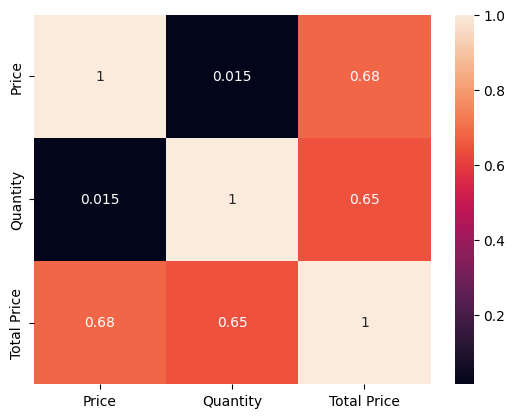

In [12]:
sns.heatmap(numeric.corr(), annot = True)

Correlation shows fairness, because if the price is higher then the total price is higher, if the quantity is higher then the total price is higher.

## CATEGORY VARIABLE

### DESCRIPTIVE STATISTICS

In [13]:
data.describe(exclude = 'number')

,Order ID,Customer ID,Product ID,Category,Product Name,Order Date,Shipping Date,Promotion,Payment Method,Shipping Status,Customer Name,Customer Email,Customer Location,Delivery Address
count,10000,10000,10000,10000,9988,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,7,970,366,385,4,4,4,9368,9794,7,10000
top,bdd640fb,b5ef1ee6,0f043e7d,Sports,Act,2024-01-06,2024-12-27,Free Shipping,Cash on Delivery,Delivered,Daniel Smith,fsmith@example.org,New York,"23923 Christopher Crossroad Suite 959, West Kr..."
freq,1,1,1,1510,22,43,79,2568,2598,2522,6,5,1451,1


### UNIQUE VALUES

In [14]:
# Select all categorical columns
categorical = data.select_dtypes(include = 'object')

# Count unique values for each variable
categorical.nunique()

,0
Order ID,10000
Customer ID,10000
Product ID,10000
Category,7
Product Name,970
Order Date,366
Shipping Date,385
Promotion,4
Payment Method,4
Shipping Status,4


# CONCLUSSION OF EDA

1. Type Data Order Date and Shipping Date have type object, this is wrong type, but overall is same with type data wich should.

2. Have Missing Value in Product Name, but cannot be saved, so i will drop the row have Missing Value

3. No Duplicated Data

4. Data have not normal distribution

5. Data have outliers in Total Price, but the outliers considered safe

# DATA CLEANING

In this Data Cleaning, I will:

1. Change type data of Order Date and Shipping Date

2. Drop row have Missing Values

## CHANGE TYPE DATA

In [19]:
# Change the Order Date and Shipping Date data types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Shipping Date'] = pd.to_datetime(data['Shipping Date'])

## DROP MISSING VALUES

In [20]:
# Drop Missing Values
data = data.dropna()

# CONCLUSSION OF DATA CLEANING

The data has been cleaned on the order data and shipping date, the data type has been changed and missing values ​​have been deleted, the data can be continued in the Google Looker analysis (next analysis).

In [21]:
data.to_csv('ecommerce_dummy_data_cleaned.csv', index = False)